Basic Imports

In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [30]:
data = pd.read_csv("insurance.csv")

data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [31]:
data.shape

(1338, 7)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Check the feature correlations

<AxesSubplot:>

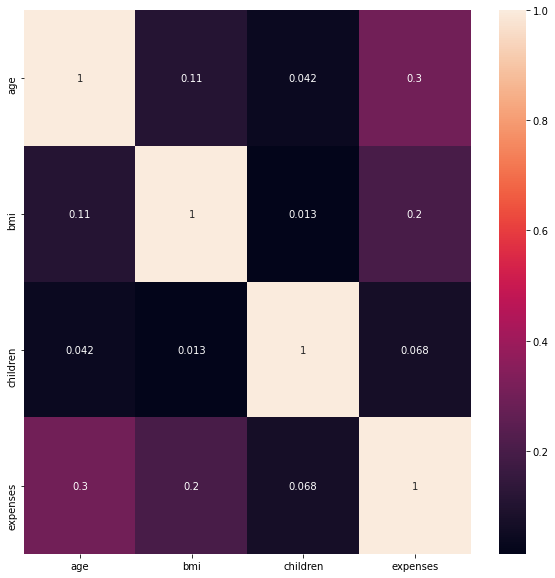

In [33]:
fig, ax = plt.subplots(figsize=(10,10))

corr = data.corr()
sns.heatmap(corr , annot = True , ax=ax)

Label Encode Object Types

In [34]:
d_types = dict(data.dtypes)
for name , type_ in d_types.items():
    if str(type_) == 'object':
        print(f"<======== {name} ===========>")
        print(data[name].value_counts())
        print()

<======== sex ===========>
male      676
female    662
Name: sex, dtype: int64

<======== smoker ===========>
no     1064
yes     274
Name: smoker, dtype: int64

<======== region ===========>
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64



In [35]:
from sklearn.preprocessing import LabelEncoder

for name , type_ in d_types.items():
    if str(type_) == 'object':
        Le = LabelEncoder()
        data[name] = Le.fit_transform(data[name])

Check info after Label Encoding

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


One hot Encoding 

In [37]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
part = onehotencoder.fit_transform(data['region'].values.reshape(-1,1)).toarray()

values = dict(data["region"].value_counts())

for e , (val , _) in enumerate(values.items()):
    data["region_" + str(val)] = part[:,e]

data = data.drop(["region"] , axis = 1)

data.head()

,age,sex,bmi,children,smoker,expenses,region_2,region_3,region_1,region_0
0,19,0,27.9,0,1,16884.92,0.0,0.0,0.0,1.0
1,18,1,33.8,1,0,1725.55,0.0,0.0,1.0,0.0
2,28,1,33.0,3,0,4449.46,0.0,0.0,1.0,0.0
3,33,1,22.7,0,0,21984.47,0.0,1.0,0.0,0.0
4,32,1,28.9,0,0,3866.86,0.0,1.0,0.0,0.0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   expenses  1338 non-null   float64
 6   region_2  1338 non-null   float64
 7   region_3  1338 non-null   float64
 8   region_1  1338 non-null   float64
 9   region_0  1338 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 104.7 KB


Handle Skewness in Predictive column

In [39]:
Original_Y = data["expenses"].values.copy()

In [40]:
Original_Y

array([16884.92,  1725.55,  4449.46, ...,  1629.83,  2007.95, 29141.36])

Skewness in Column : Expenses  1.51587966289798


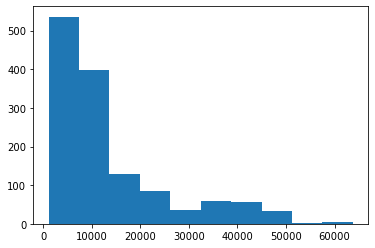

In [41]:
print("Skewness in Column : Expenses " , data["expenses"].skew())

plt.hist(data["expenses"])
plt.show()

Skewness in Column : Log Expenses  -0.0900974307762623


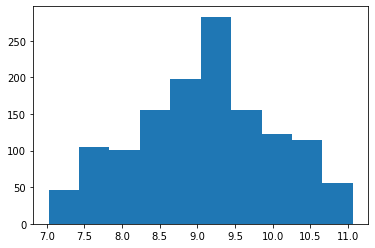

In [42]:
col_log = np.log(data["expenses"])
print("Skewness in Column : Log Expenses " , col_log.skew())

plt.hist(col_log)
plt.show()

Skewness in Column : Sqrt Expenses  0.7958625295340573


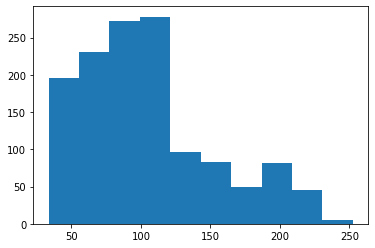

In [43]:
col_sqrt = np.sqrt(data["expenses"])

print("Skewness in Column : Sqrt Expenses " ,col_sqrt.skew())

plt.hist(col_sqrt)
plt.show()

Skewness in Column : Sqrt Expenses  -0.008734062011873602


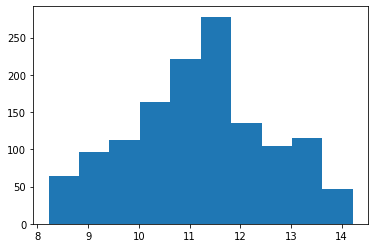

In [44]:
from scipy import stats 

col_cox , lam = stats.boxcox(data["expenses"])[0:2]
print("Skewness in Column : Sqrt Expenses " ,pd.Series(col_cox).skew())

plt.hist(col_cox)
plt.show()

In [45]:
data["expenses"] = col_cox

Make Features and Targets

In [46]:
remaining_columns = list(data.columns)
remaining_columns.remove("expenses")

In [47]:
X = data[remaining_columns].values 
Y = data['expenses'].values

In [48]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
X = Scaler.fit_transform(X)

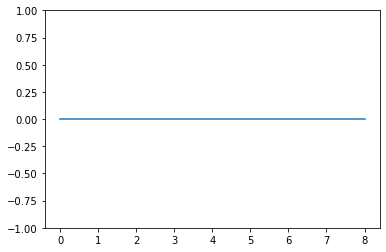

In [49]:
# check whether data is standardized or not 
# mean should be 1 

plt.ylim(-1,1)

means = []
for i in range(X.shape[1]):
    means.append(np.mean(X[:,i]))
plt.plot(means , scaley=False)

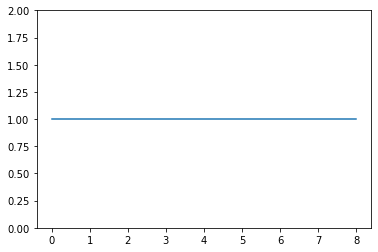

In [50]:
# Check variances 

plt.ylim(0,2)

vars = []
for i in range(X.shape[1]):
    vars.append(np.var(X[:,i]))
plt.plot(vars)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA 

pca = PCA(n_components = 7)
X = pca.fit_transform(X)

pca.explained_variance_ratio_.cumsum()

array([0.17443158, 0.32284686, 0.46979121, 0.59049392, 0.70795154,
       0.81403557, 0.91668333])

In [52]:
from sklearn.model_selection import KFold 

k_fold = KFold(n_splits=5)

test_scores = []
for train_idx , test_idx in k_fold.split(X):
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]

    Xtest = X[test_idx]
    Ytest = Y[test_idx]

    model = LinearRegression()
    model.fit(Xtrain , Ytrain)

    test_scores.append(model.score(Xtest , Ytest))

 mean score of k folds :  0.7668904952811475


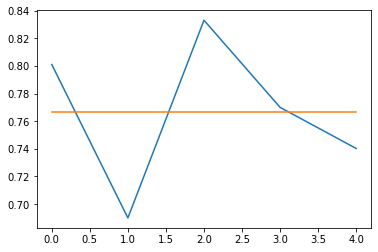

In [53]:
print(" mean score of k folds : " , np.mean(test_scores))

plt.plot(test_scores)
plt.plot([np.mean(test_scores)]*len(test_scores))
plt.show()

Can we Bring back the data?

In [ ]:
from scipy.special import inv_boxcox

Real_data = inv_boxcox(Y , lam)

In [ ]:
Real_data[:10]

In [ ]:
Original_Y[:10]